# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [3]:
print(len(cities))

589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}appid={weather_api}&units=metric&q=" + city

    # requests.get to create jason
    city_response = requests.get(city_url)
    city_json = city_response.json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
       # Parse the JSON and retrieve data
        city_weather = city_json
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lon = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]
        city_wind = city_json["wind"] 
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lon": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | padang
Processing Record 2 of Set 1 | walvis bay
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | nadi
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | newman


KeyboardInterrupt: 

In [5]:
city_json

{'coord': {'lon': -121.0208, 'lat': 37.3138},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 35.19,
  'feels_like': 32.63,
  'temp_min': 35.19,
  'temp_max': 35.19,
  'pressure': 1010,
  'humidity': 13,
  'sea_level': 1010,
  'grnd_level': 1003},
 'visibility': 10000,
 'wind': {'speed': 0.43, 'deg': 259, 'gust': 2.6},
 'clouds': {'all': 0},
 'dt': 1722891664,
 'sys': {'type': 1,
  'id': 4865,
  'country': 'US',
  'sunrise': 1722863546,
  'sunset': 1722913655},
 'timezone': -25200,
 'id': 5376870,
 'name': 'Newman',
 'cod': 200}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv("Resources/cities.csv")

# Show Record Count
city_data_df.count()

City_ID       577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("Resources/cities.csv")

In [10]:
# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv")
columns_to_remove = ["Unnamed: 0"]
city_data_df.drop(columns=columns_to_remove, inplace= True)
city_data_df.to_csv("Resources/cities.csv", index= False)
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

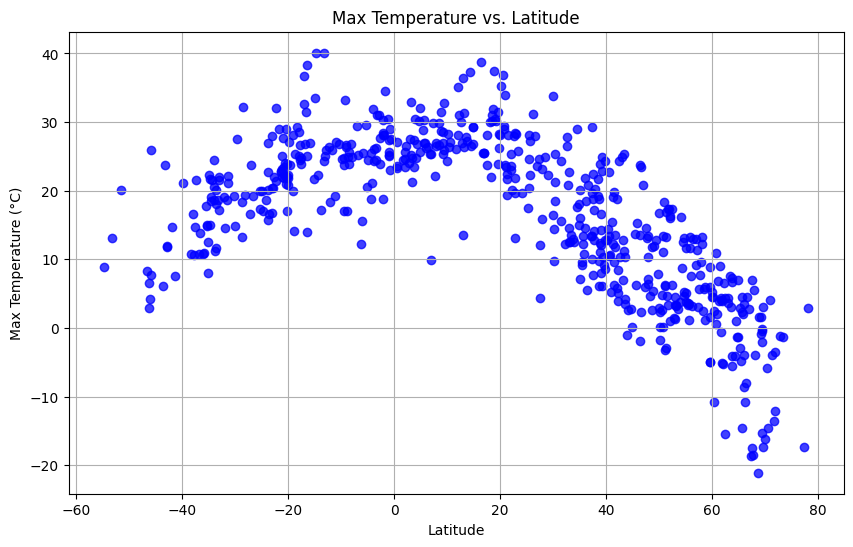

In [12]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title('Max Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)


# Save the figure
plt.savefig("Resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

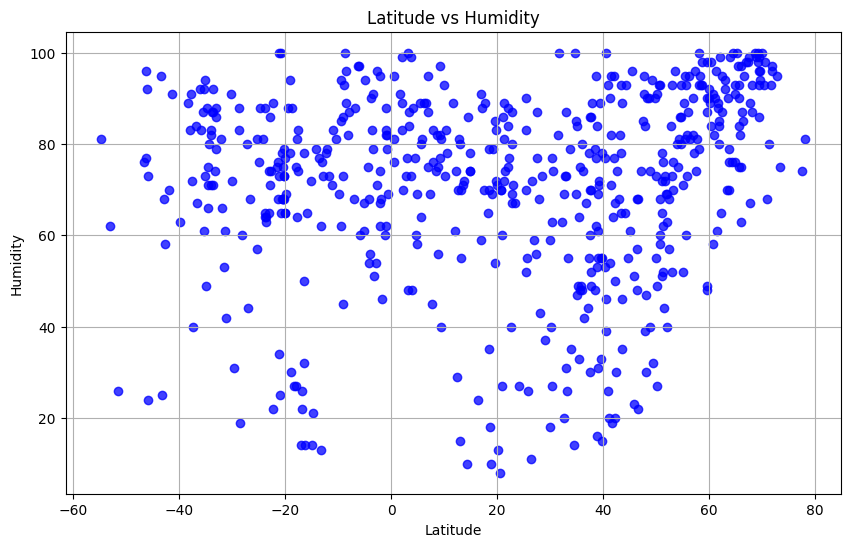

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("Resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

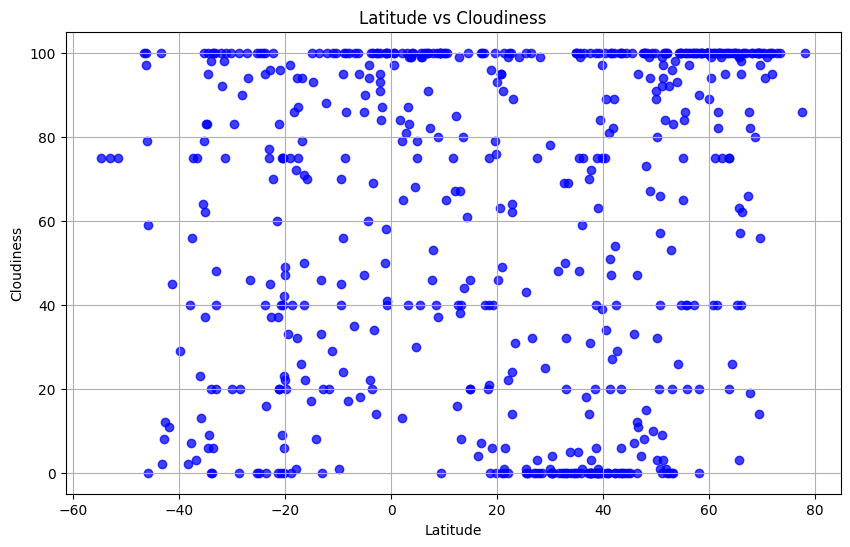

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='blue', alpha=0.75)
# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Resources/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

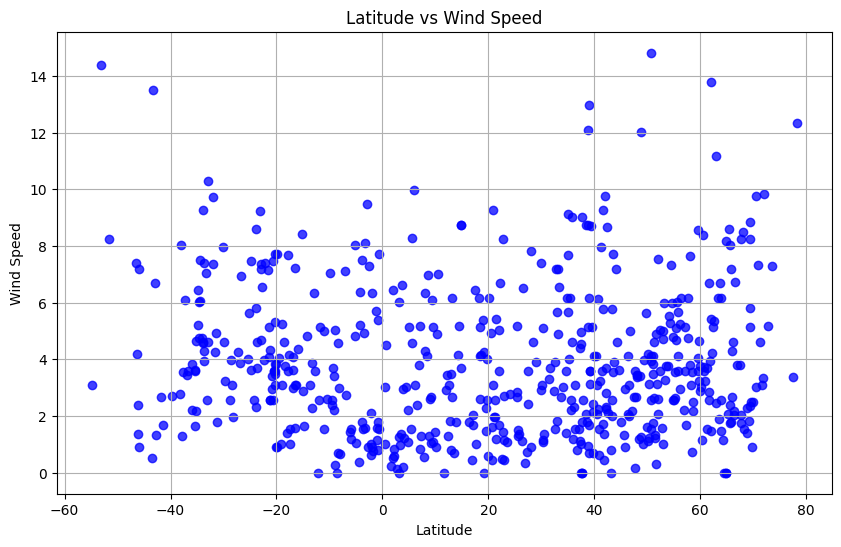

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='blue', alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
north_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df[city_data_df["Lat"] <=0]

# Display sample data
south_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

In [29]:
# Linear regression on Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
title = "Latitude vs Max Temp"
plot_linear_regression(x_values, y_values, x_label, y_label, title)


None


The r^2-value is: 0.6720220238897325


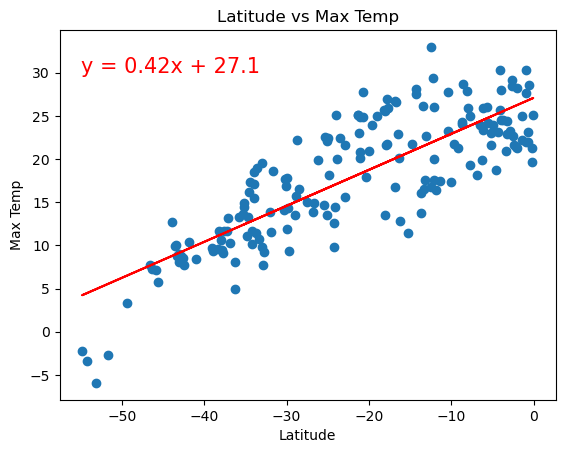

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


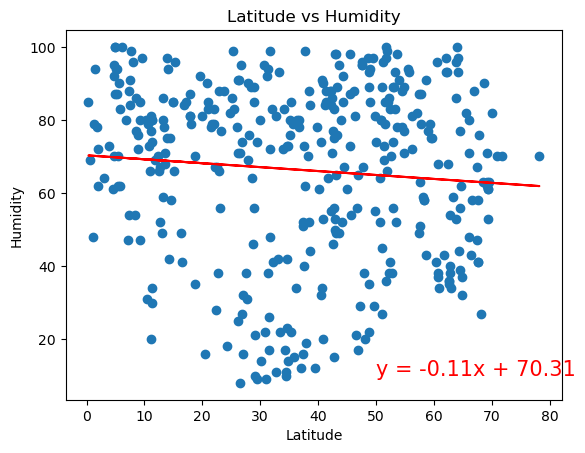

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


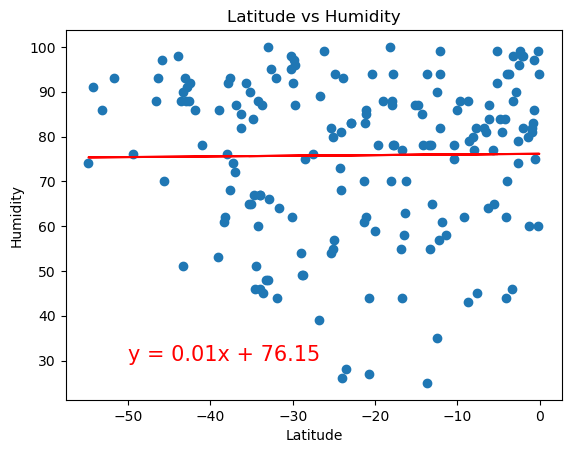

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


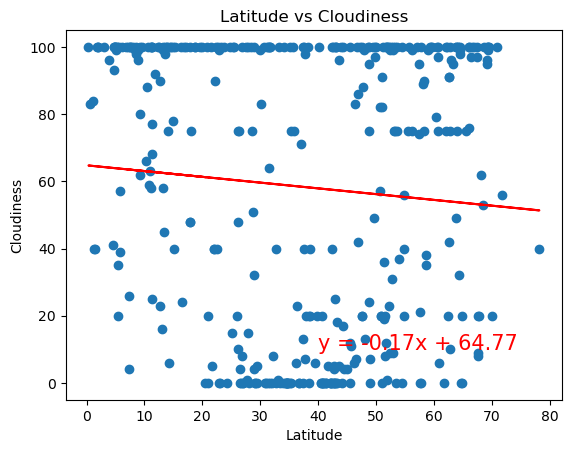

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


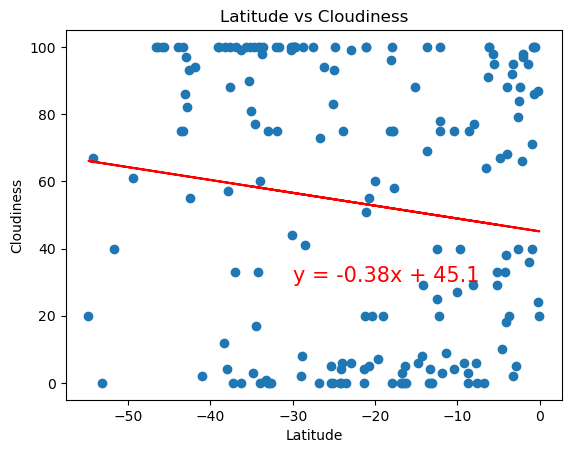

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


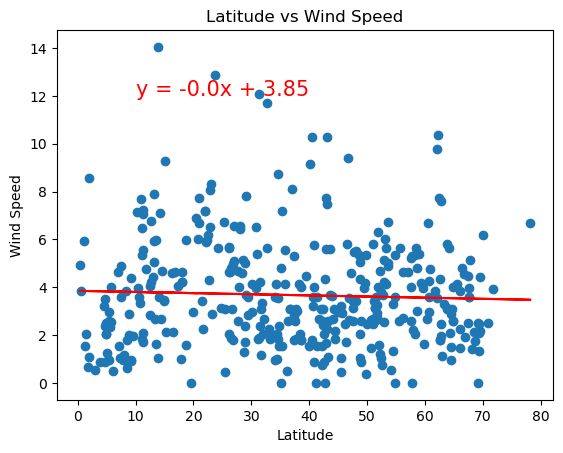

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


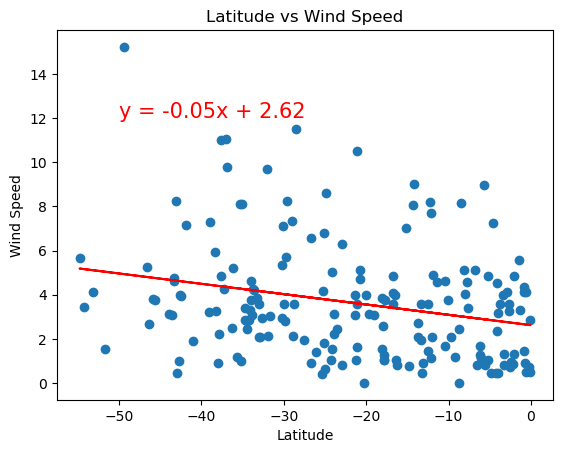

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE